Training curves

In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
logs_path = os.path.join("..", "output")

In [3]:
def draw_curves(name, path):

    logs = {}
    csv_files = glob(os.path.join(logs_path, '%s/**/*log.csv' % path), recursive=True) 
    
    for i, f in enumerate(csv_files):
        logs["%s_%s" % (name, os.path.basename(os.path.dirname(f)))] = f

    dfs = []
    for name in logs:
        dfs.append(pd.read_csv(logs[name], index_col='epoch'))

    plt.figure(figsize=(16, 4))
    var_name = 'train_loss'
    plt.subplot(121)
    plt.title("Training loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 1.5])    

    var_name = 'val_loss'
    plt.subplot(122)
    plt.title("Validation loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 1.5])


    plt.figure(figsize=(16, 4))
    var_name = 'train_loss'
    plt.subplot(121)
    plt.title("Training loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 0.3])

    var_name = 'val_loss'
    plt.subplot(122)
    plt.title("Validation loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 0.3])

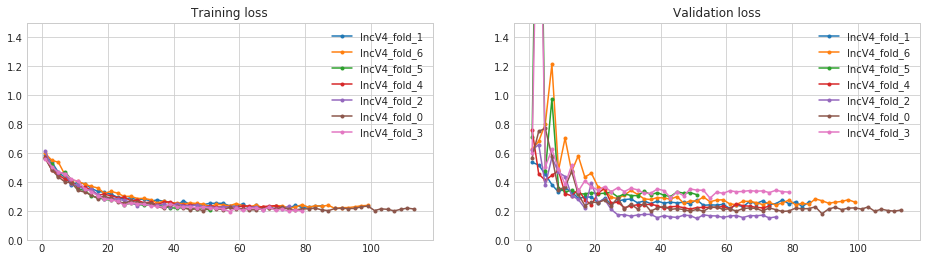

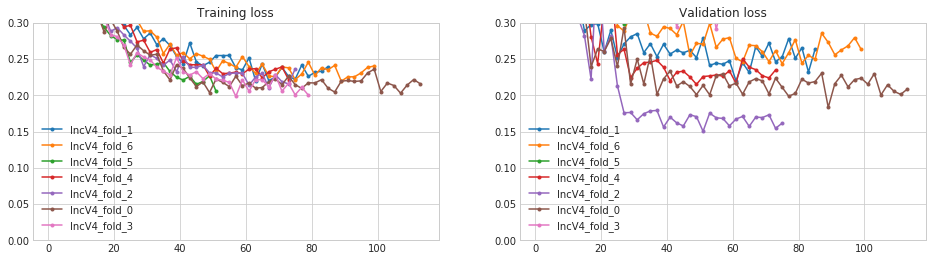

In [233]:
draw_curves('IncV4', 'training_IcebergInceptionV4_20171203_2356')

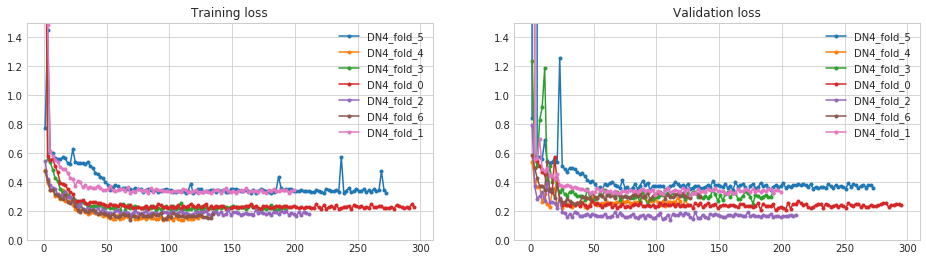

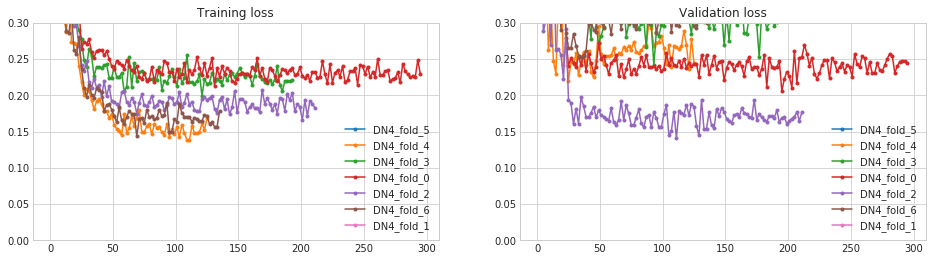

In [234]:
draw_curves('DN4', 'training_IcebergDenseNet4_20171208_0005')

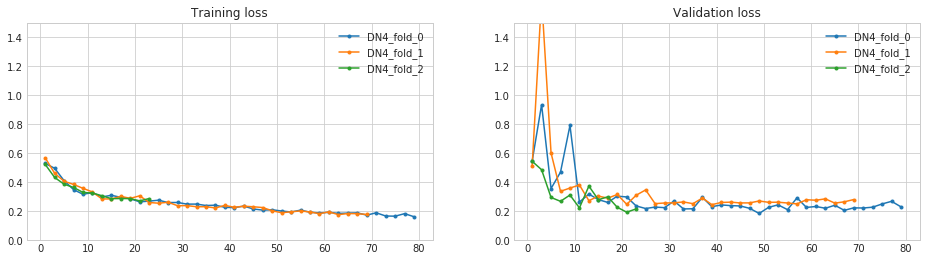

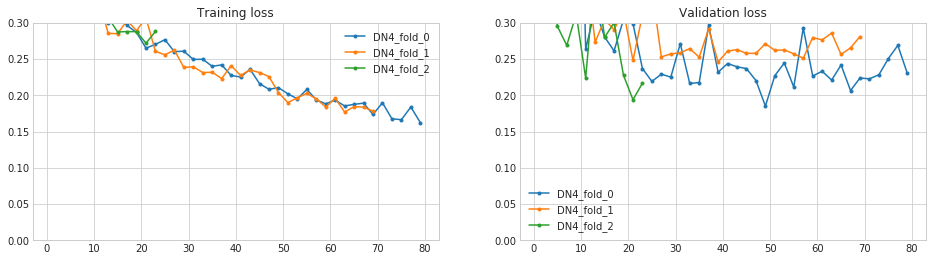

In [124]:
draw_curves('DN4', 'training_IcebergDenseNet4_20171207_2223')

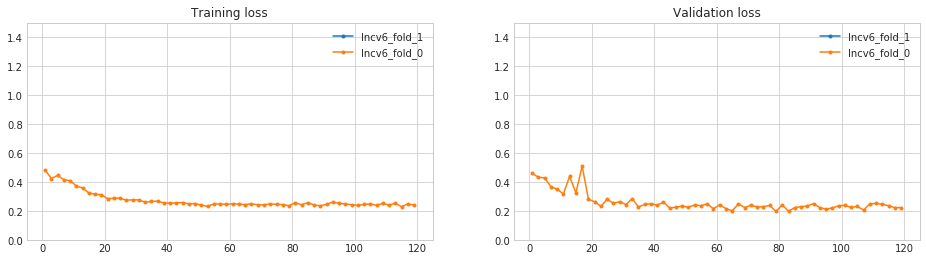

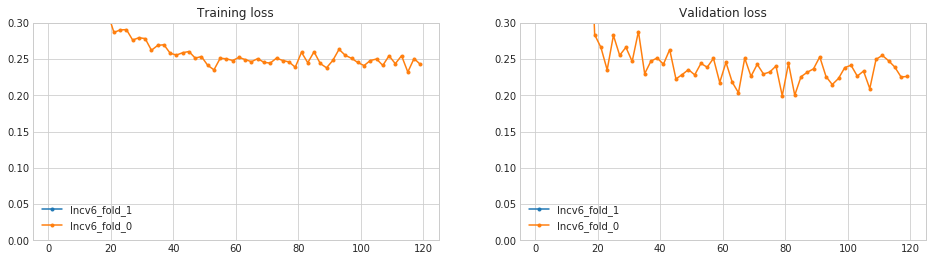

In [235]:
draw_curves('Incv6', 'training_IcebergInceptionV6_20171208_2046')

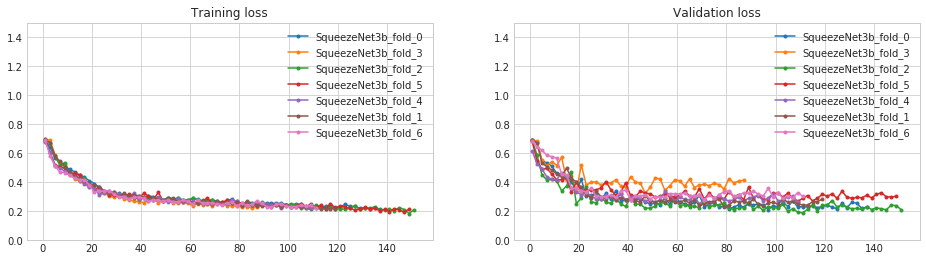

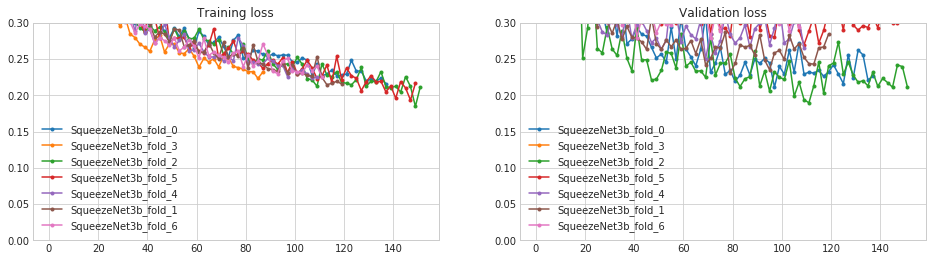

In [236]:
draw_curves('SqueezeNet3b', 'training_IcebergVGGv2_20171208_2356')

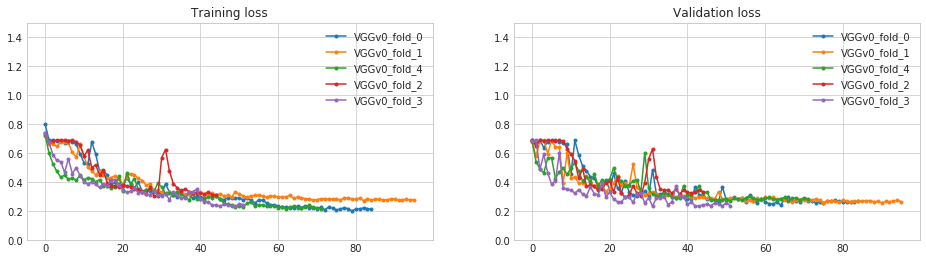

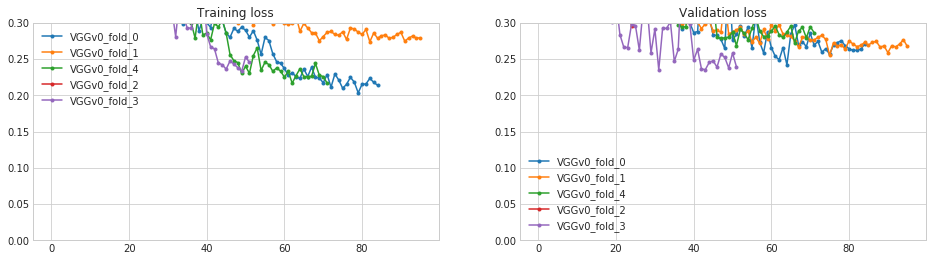

In [237]:
draw_curves('VGGv0', 'training_IcebergVGGv0_20171209_0943')

Kaggle score : 0.1881
```
!ls ../results/submission__avg_models__predictions_config_kfolds_vgg_v0_20171209_1200_20171209_1114.csv
!cat ../scripts/test_configs/config_kfolds_vgg_v0_20171209_1200.json
```

In [446]:
!cat ../scripts/test_configs/config_kfolds_vgg_v0_20171209_1200.json

{
    "seed": 7777,
    "batch_size": 32,
    "num_workers": 12,

    "test_aug": {
        "Compose": {
            "transforms": [
                {"ToThreeBands": {}},
                {"RandomFlip": {"mode": "h", "proba": 0.5}},
                {"RandomFlip": {"mode": "v", "proba": 0.5}},
                {"_ToTensor": {}},
                {"_Normalize": {}}
            ]}
    },

    "models": [
        {
            "name": {"IcebergVGGv0": {"input_n_channels": 3, "n_classes": 1, "cfg_type": "B"}},
            "weights_path": "../output/training_IcebergVGGv0_20171209_1049/fold_0"
        },
        {
            "name": {"IcebergVGGv0": {"input_n_channels": 3, "n_classes": 1, "cfg_type": "B"}},
            "weights_path": "../output/training_IcebergVGGv0_20171209_1049/fold_1"
        },
        {
            "name": {"IcebergVGGv0": {"input_n_channels": 3, "n_classes": 1, "cfg_type": "B"}},
            "weights_path": "../output/training_IcebergVGGv0_20171209_1049/fold_2"
        }

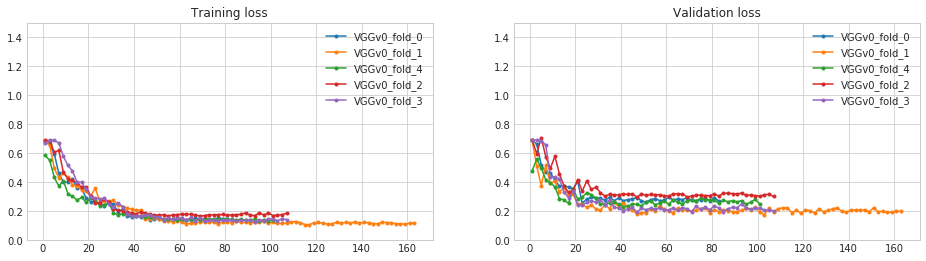

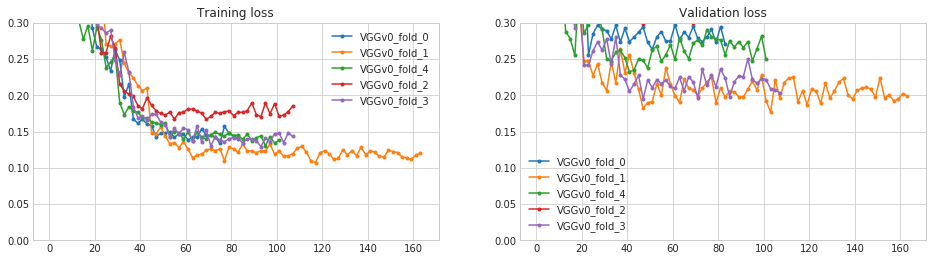

In [238]:
draw_curves('VGGv0', 'training_IcebergVGGv0_20171209_1049')

In [331]:
!find ../output/training_IcebergVGGv0_20171209_1049 -name "*.pth.*"

../output/training_IcebergVGGv0_20171209_1049/fold_2/model_val_loss=0.2979.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_4/model_val_loss=0.2322.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_0/model_val_loss=0.2558.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_3/model_val_loss=0.1948.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_1/model_val_loss=0.1769.pth.tar


In [447]:
!cat ../output/training_IcebergVGGv0_20171209_1049/fold_0/conf.log

optimizer: {'Adam': {'params': [{'lr': 0.0005, 'params': {'model.features.parameters': {}}}, {'lr': 0.001, 'params': {'model.classifier.parameters': {}}}]}}
criterion: {'BCEWithLogitsLoss': {}}
validate_every_epoch: 2
train_aug: {'Compose': {'transforms': [{'ToThreeBands': {}}, {'RandomAffine': {'interpolation': 0, 'translate': [0.15, 0.15], 'rotation': [-5, 5]}}, {'RandomFlip': {'mode': 'h', 'proba': 0.5}}, {'RandomFlip': {'mode': 'v', 'proba': 0.5}}, {'_ToTensor': {}}, {'_Normalize': {}}]}}
early_stopping: {'patience': 30, 'mode': 'min'}
seed: 12345
to_proba_fn: torch.nn.functional.sigmoid
lr_schedulers: [{'ReduceLROnPlateau': {'optimizer': '_opt', 'mode': 'min', 'verbose': 'True', 'patience': 5, 'factor': 0.1}}]
model: {'IcebergVGGv0': {'cfg_type': 'B', 'n_classes': 1, 'input_n_channels': 3}}
test_aug: {'Compose': {'transforms': [{'ToThreeBands': {}}, {'RandomFlip': {'mode': 'h', 'proba': 0.5}}, {'RandomFlip': {'mode': 'v', 'proba': 0.5}}, {'_ToTensor': {}}, {'_Normalize': {}}]}}
n_

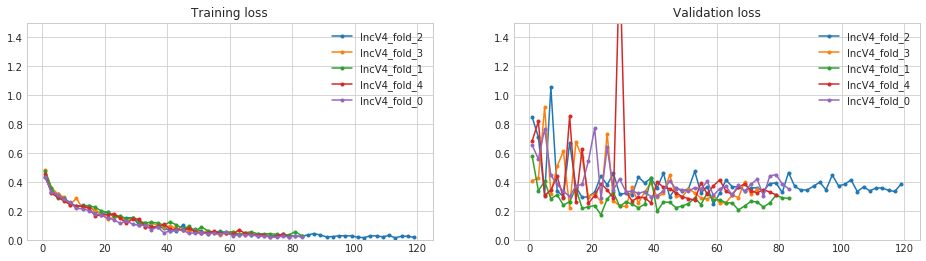

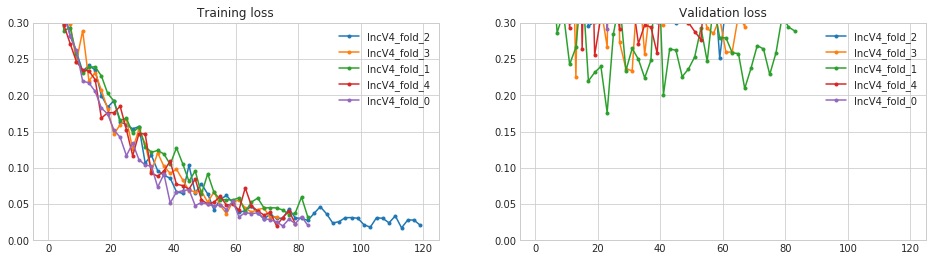

In [239]:
draw_curves('IncV4', 'training_IcebergInceptionV4_20171209_1133')

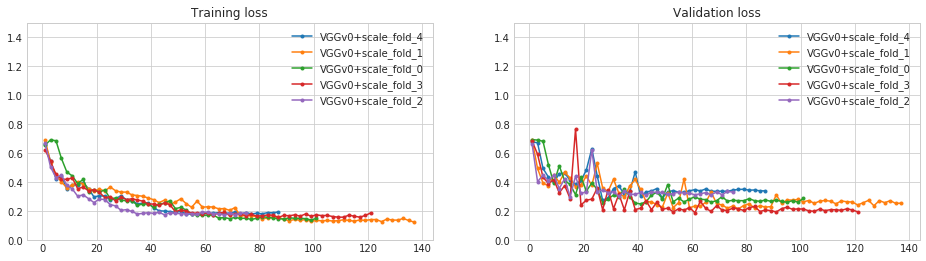

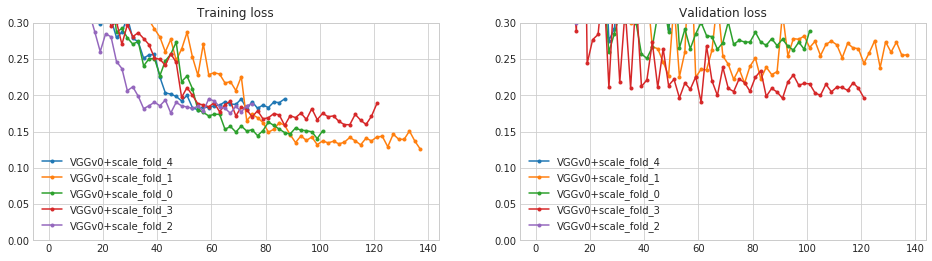

In [240]:
draw_curves('VGGv0+scale', '20171211_0007_training_config_vgg_20171211_0123')

In [332]:
!find ../output/20171211_0007_training_config_vgg_20171211_0123 -name "*.pth.*"

../output/20171211_0007_training_config_vgg_20171211_0123/fold_2/model_val_loss=0.2997.pth.tar
../output/20171211_0007_training_config_vgg_20171211_0123/fold_4/model_val_loss=0.2756.pth.tar
../output/20171211_0007_training_config_vgg_20171211_0123/fold_0/model_val_loss=0.2510.pth.tar
../output/20171211_0007_training_config_vgg_20171211_0123/fold_3/model_val_loss=0.1905.pth.tar
../output/20171211_0007_training_config_vgg_20171211_0123/fold_1/model_val_loss=0.2167.pth.tar


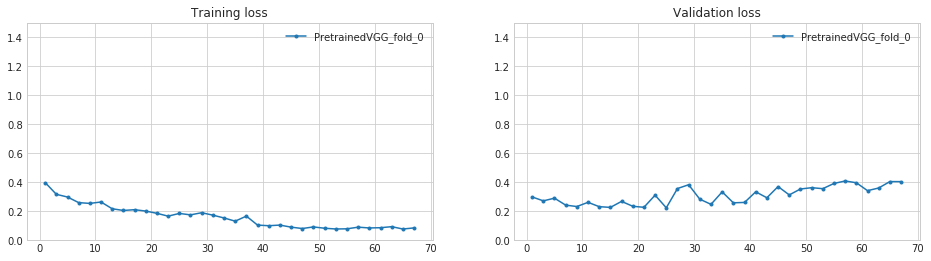

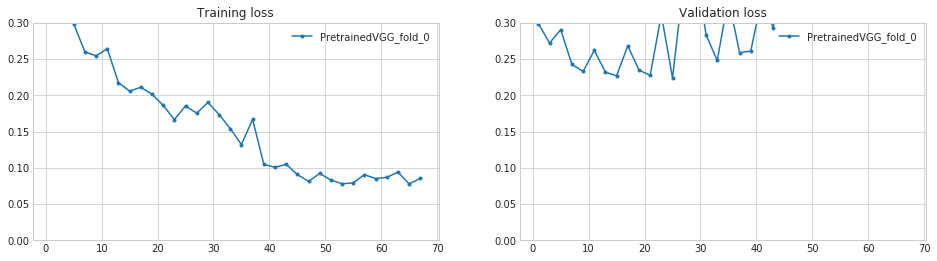

In [241]:
draw_curves('PretrainedVGG', '20171212_0038_training_config_pretrained_vgg16_20171212_0110')

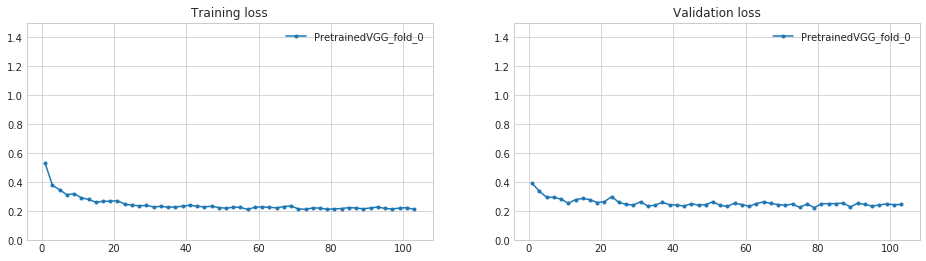

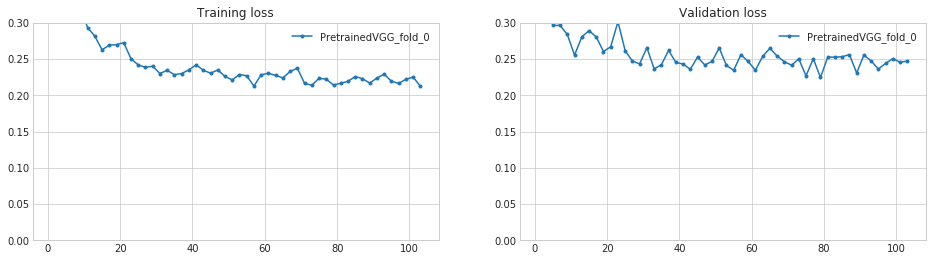

In [242]:
draw_curves('PretrainedVGG', '20171212_0043_training_config_pretrained_vgg16_20171212_0110')

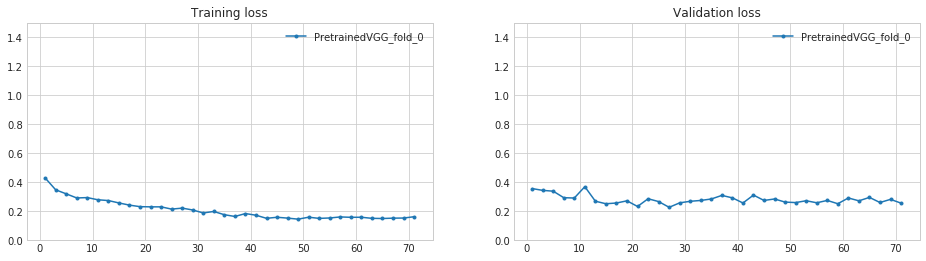

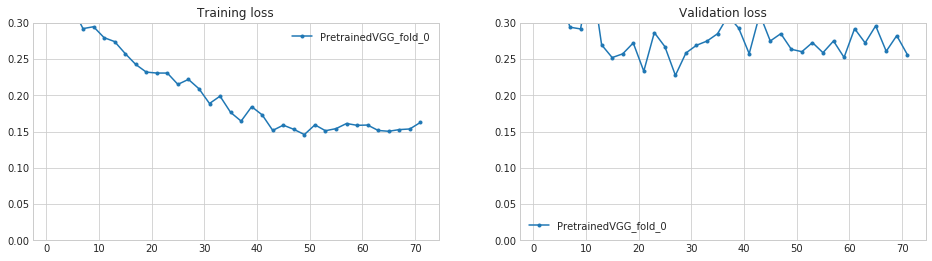

In [243]:
draw_curves('PretrainedVGG', '20171212_0049_training_config_pretrained_vgg16_20171212_0110')

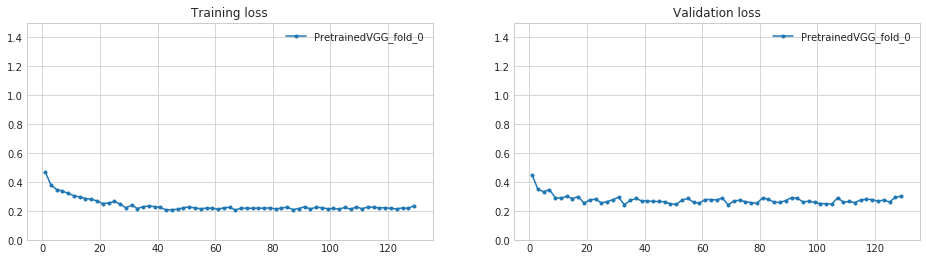

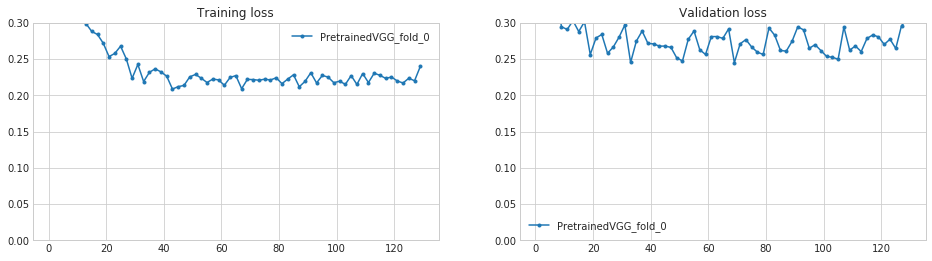

In [244]:
draw_curves('PretrainedVGG', '20171212_0053_training_config_pretrained_vgg16_20171212_0110')

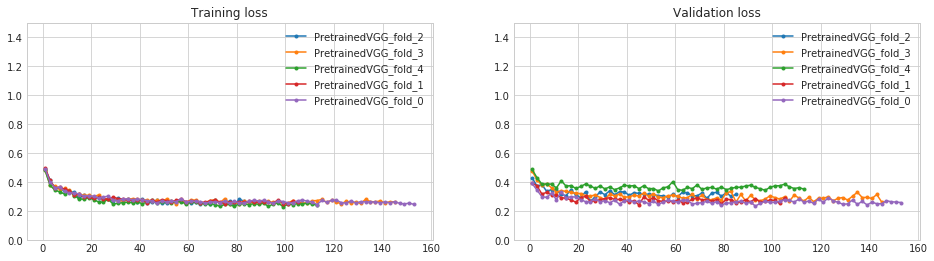

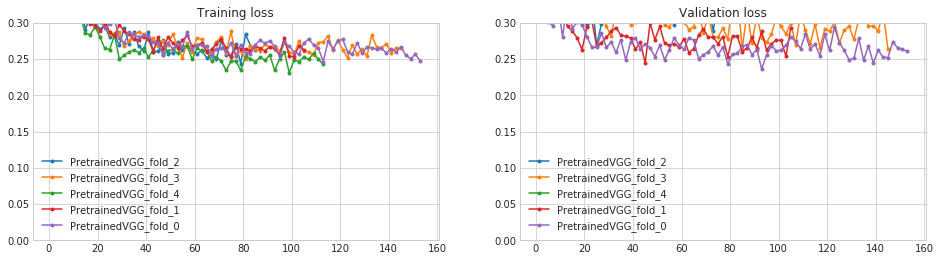

In [245]:
draw_curves('PretrainedVGG', '20171212_0110_training_config_pretrained_vgg16_20171212_0110')

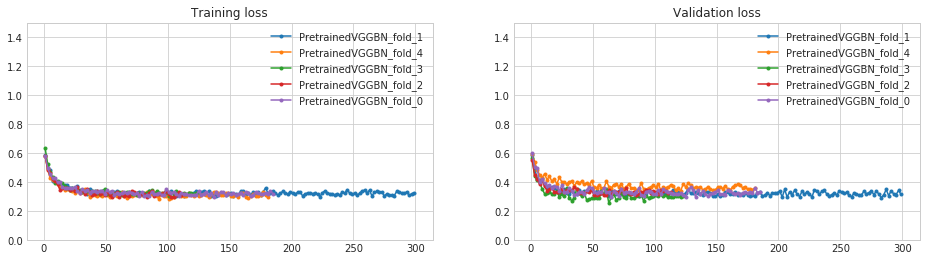

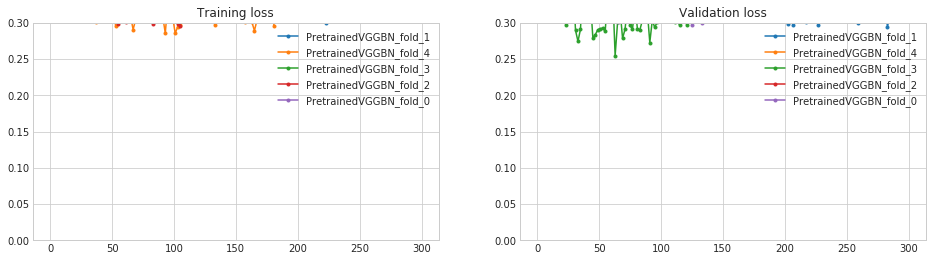

In [246]:
draw_curves('PretrainedVGGBN', '20171212_0826_training_config_pretrained_vgg16bn_20171212_0110')

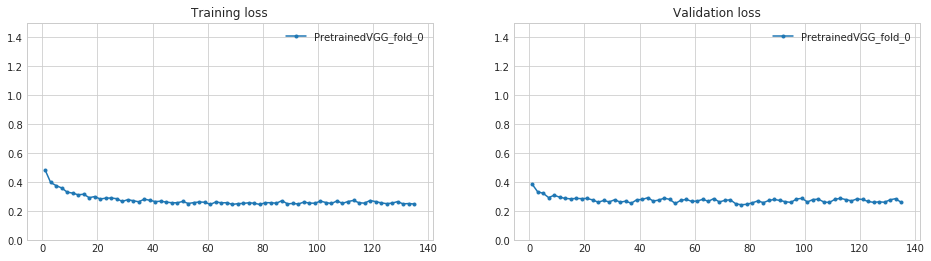

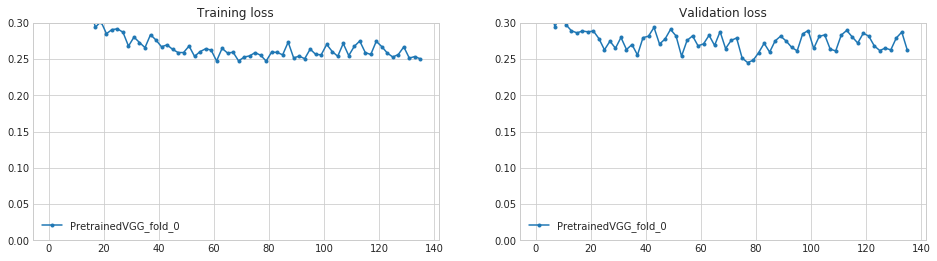

In [247]:
draw_curves('PretrainedVGG', '20171214_2303_training_config_pretrained_vgg16_20171214_2343')

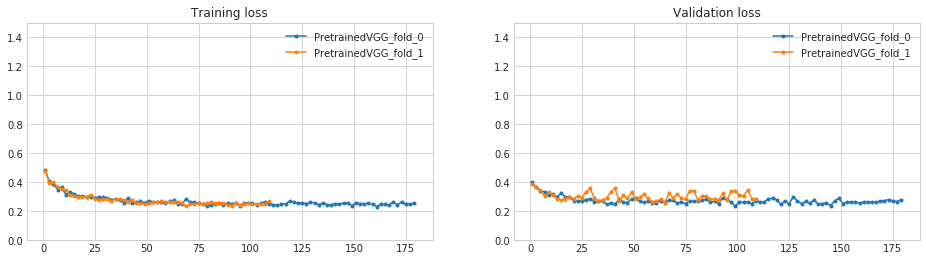

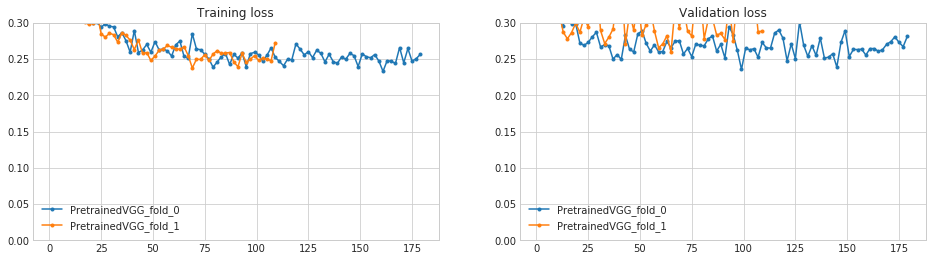

In [248]:
draw_curves('PretrainedVGG', '20171214_2312_training_config_pretrained_vgg16_20171214_2343')

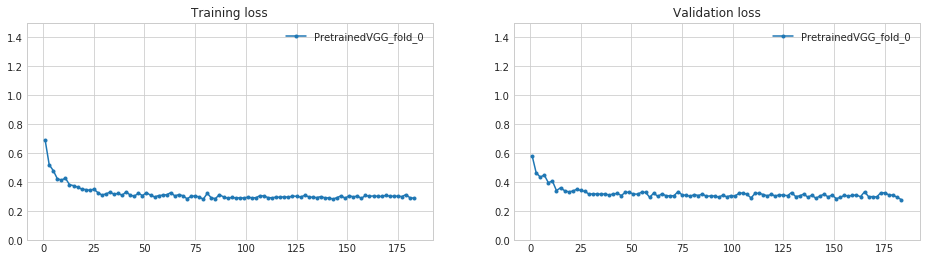

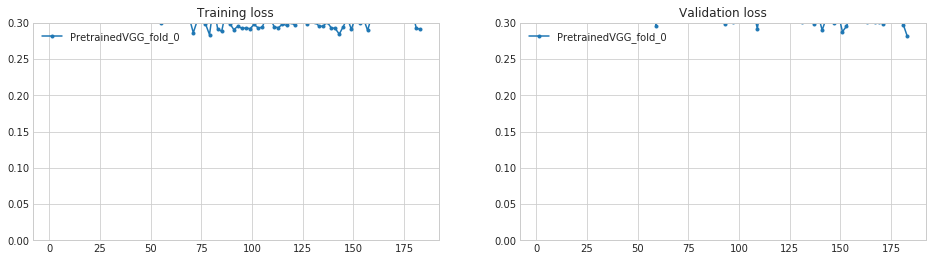

In [249]:
draw_curves('PretrainedVGG', '20171214_2318_training_config_pretrained_vgg16_20171214_2343')

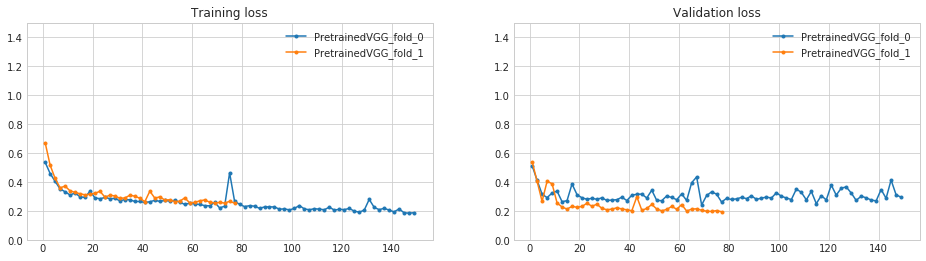

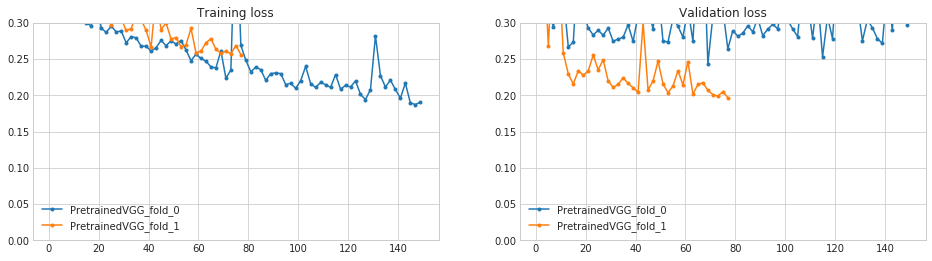

In [250]:
draw_curves('PretrainedVGG', '20171214_2336_training_config_pretrained_vgg16_20171215_0123')

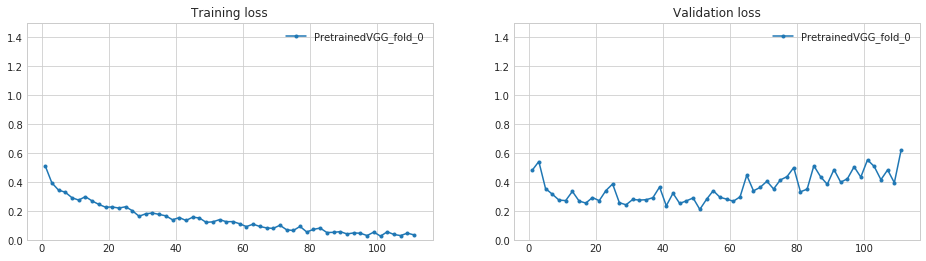

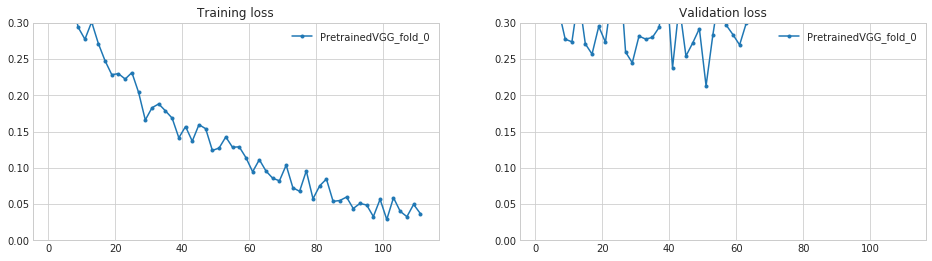

In [251]:
draw_curves('PretrainedVGG', '20171215_1811_training_config_pretrained_vgg16_20171215_1230')

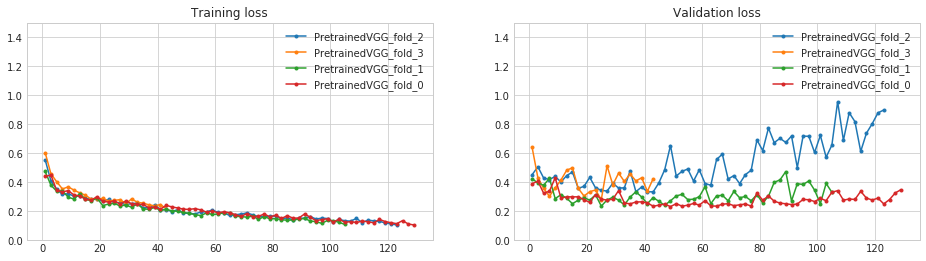

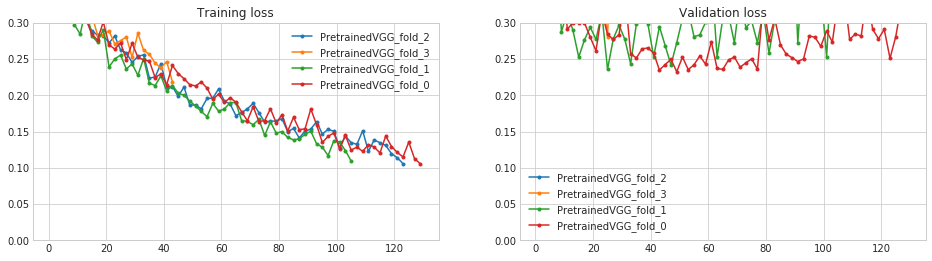

In [252]:
draw_curves('PretrainedVGG', '20171215_1818_training_config_pretrained_vgg16_20171215_1230')

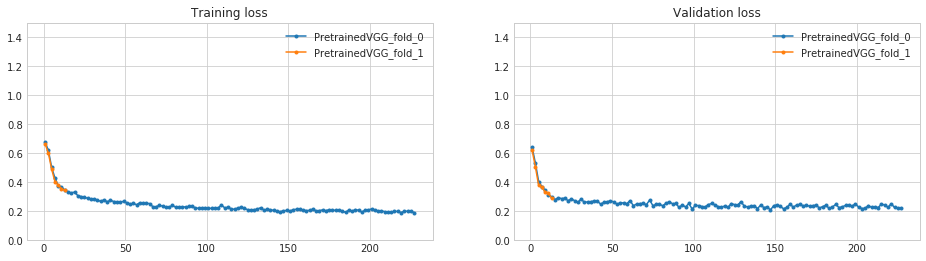

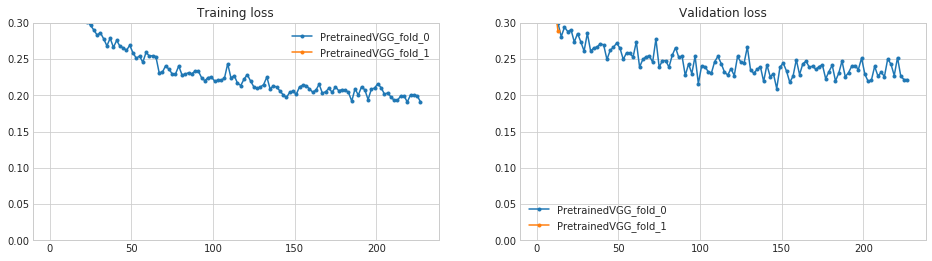

In [253]:
draw_curves('PretrainedVGG', '20171215_1910_training_config_pretrained_vgg16_20171215_1851')

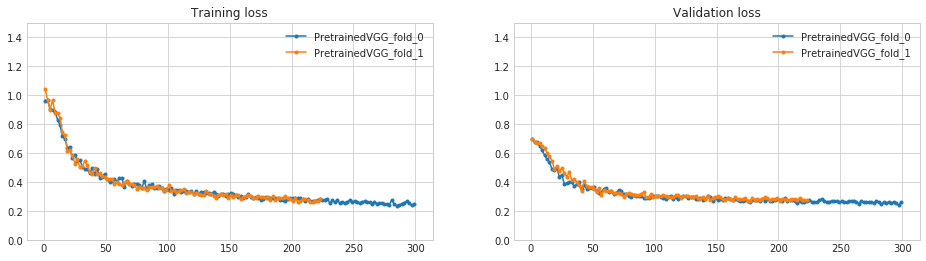

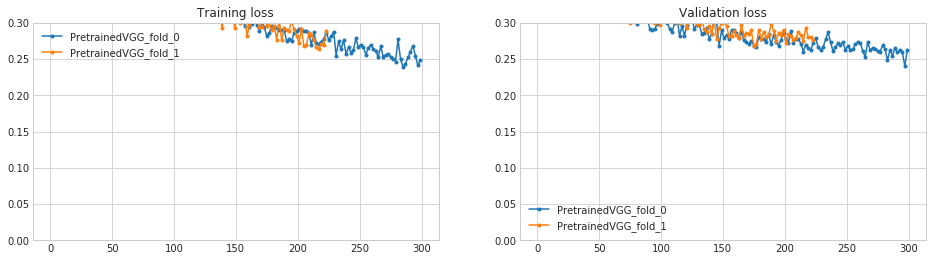

In [317]:
draw_curves('PretrainedVGG', '20171216_1017_training_config_pretrained_vgg16_20171215_2025')

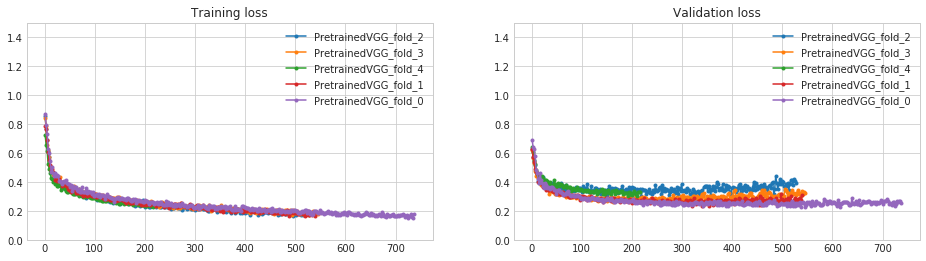

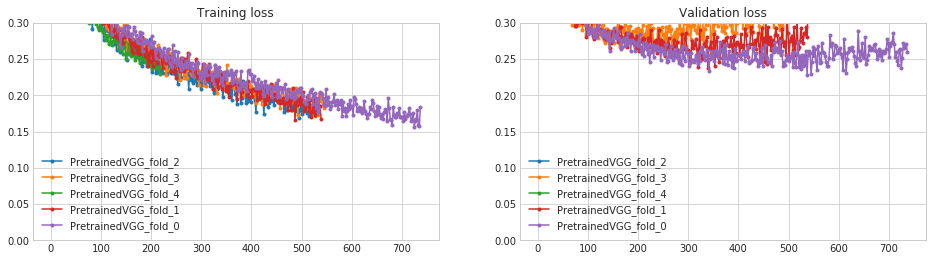

In [328]:
draw_curves('PretrainedVGG', '20171216_1106_training_config_pretrained_vgg16_20171216_1058')

In [329]:
!find ../output/20171216_1106_training_config_pretrained_vgg16_20171216_1058 -name "*.pth.*"

../output/20171216_1106_training_config_pretrained_vgg16_20171216_1058/fold_2/model_val_loss=0.3029.pth.tar
../output/20171216_1106_training_config_pretrained_vgg16_20171216_1058/fold_4/model_val_loss=0.3051.pth.tar
../output/20171216_1106_training_config_pretrained_vgg16_20171216_1058/fold_0/model_val_loss=0.2278.pth.tar
../output/20171216_1106_training_config_pretrained_vgg16_20171216_1058/fold_3/model_val_loss=0.2538.pth.tar
../output/20171216_1106_training_config_pretrained_vgg16_20171216_1058/fold_1/model_val_loss=0.2382.pth.tar


In [ ]:
../output/training_IcebergVGGv0_20171209_1049/fold_2/model_val_loss=0.2979.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_4/model_val_loss=0.2322.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_0/model_val_loss=0.2558.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_3/model_val_loss=0.1948.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_1/model_val_loss=0.1769.pth.tar

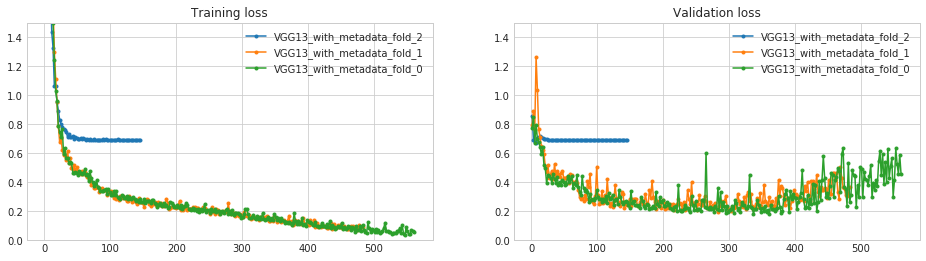

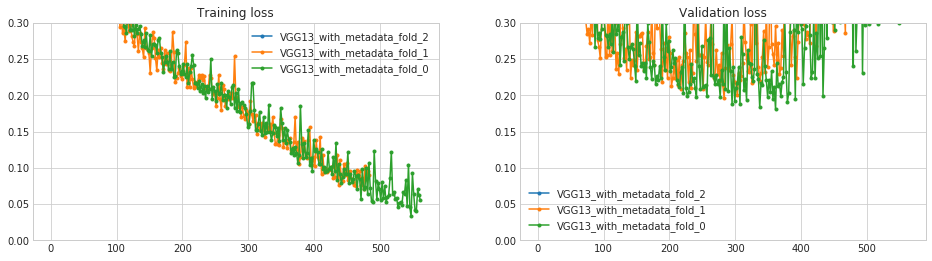

In [644]:
draw_curves('VGG13_with_metadata', '20171216_1626_training_config_vgg13_angle_stats_20171216_1654')

In [642]:
!find ../output/20171216_1626_training_config_vgg13_angle_stats_20171216_1654 -name "*.pth.*"

../output/20171216_1626_training_config_vgg13_angle_stats_20171216_1654/fold_2/model_val_loss=0.6723.pth.tar
../output/20171216_1626_training_config_vgg13_angle_stats_20171216_1654/fold_0/model_val_loss=0.1810.pth.tar
../output/20171216_1626_training_config_vgg13_angle_stats_20171216_1654/fold_1/model_val_loss=0.1958.pth.tar


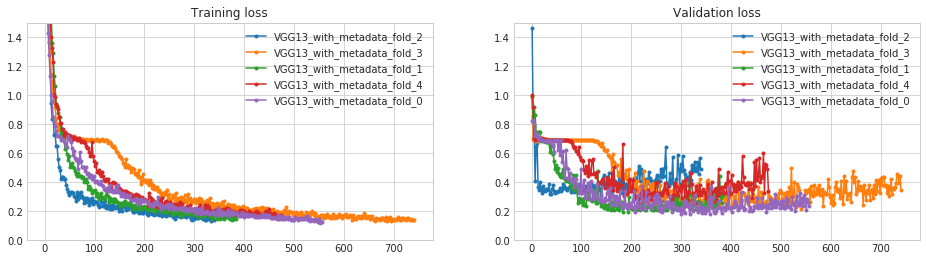

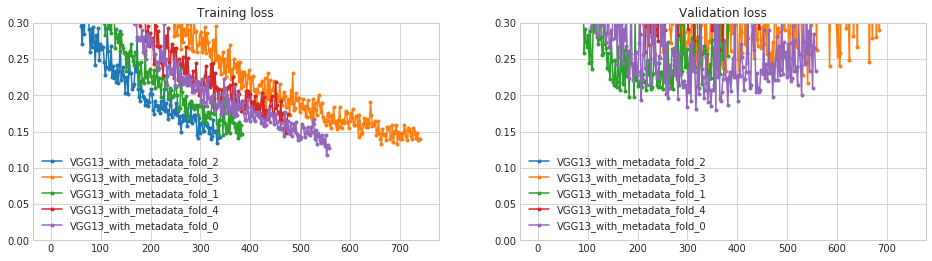

In [1136]:
draw_curves('VGG13_with_metadata', '20171217_1706_training_config_vgg13_angle_stats_20171217_1803')

In [1137]:
!find ../output/20171217_1706_training_config_vgg13_angle_stats_20171217_1803 -name "*.pth.*"

../output/20171217_1706_training_config_vgg13_angle_stats_20171217_1803/fold_2/model_val_loss=0.3112.pth.tar
../output/20171217_1706_training_config_vgg13_angle_stats_20171217_1803/fold_4/model_val_loss=0.2574.pth.tar
../output/20171217_1706_training_config_vgg13_angle_stats_20171217_1803/fold_0/model_val_loss=0.1798.pth.tar
../output/20171217_1706_training_config_vgg13_angle_stats_20171217_1803/fold_3/model_val_loss=0.2173.pth.tar
../output/20171217_1706_training_config_vgg13_angle_stats_20171217_1803/fold_1/model_val_loss=0.1972.pth.tar


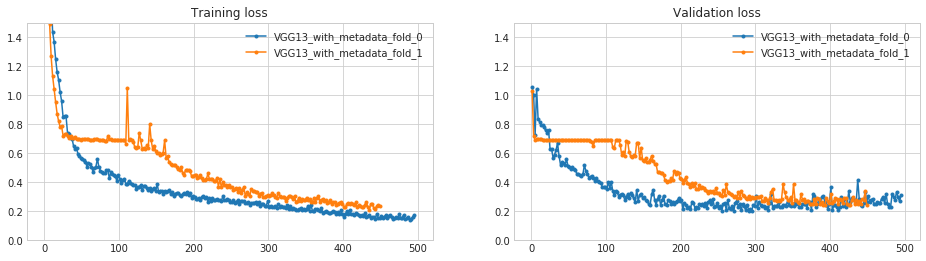

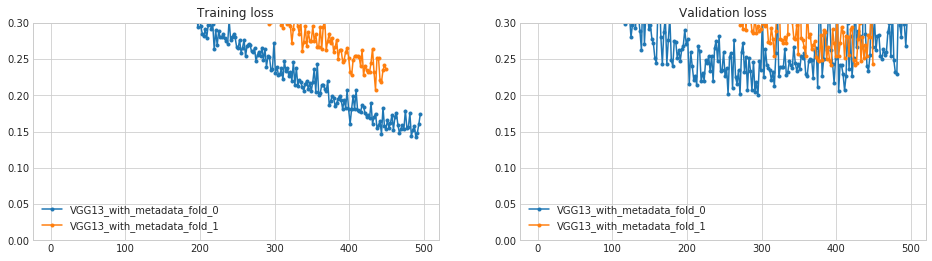

In [1313]:
draw_curves('VGG13_with_metadata', '20171218_1824_training_config_vgg13_angle_stats_20171217_2156')

In [1314]:
!find ../output/20171218_1824_training_config_vgg13_angle_stats_20171217_2156 -name "*.pth.*"

../output/20171218_1824_training_config_vgg13_angle_stats_20171217_2156/fold_0/model_val_loss=0.1999.pth.tar
../output/20171218_1824_training_config_vgg13_angle_stats_20171217_2156/fold_1/model_val_loss=0.2416.pth.tar


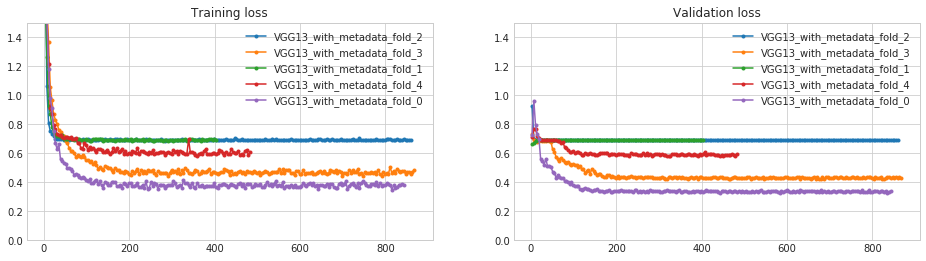

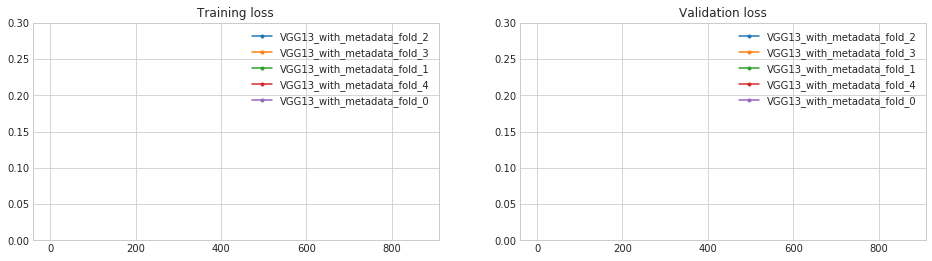

In [1344]:
draw_curves('VGG13_with_metadata', '20171218_1902_training_config_vgg13_angle_stats_20171218_2000')

In [1327]:
!find ../output/20171218_1902_training_config_vgg13_angle_stats_20171218_2000 -name "*.pth.*"

../output/20171218_1902_training_config_vgg13_angle_stats_20171218_2000/fold_0/model_val_loss=0.3298.pth.tar


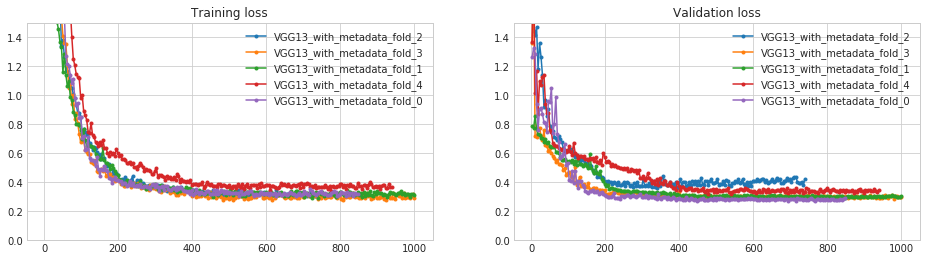

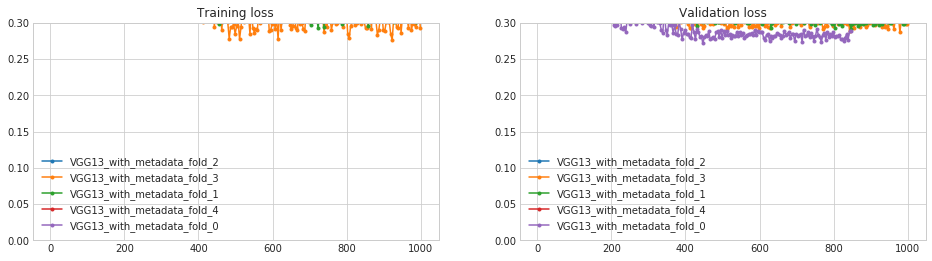

In [1484]:
draw_curves('VGG13_with_metadata', '20171219_0121_training_config_vgg13_angle_stats_20171218_2000')

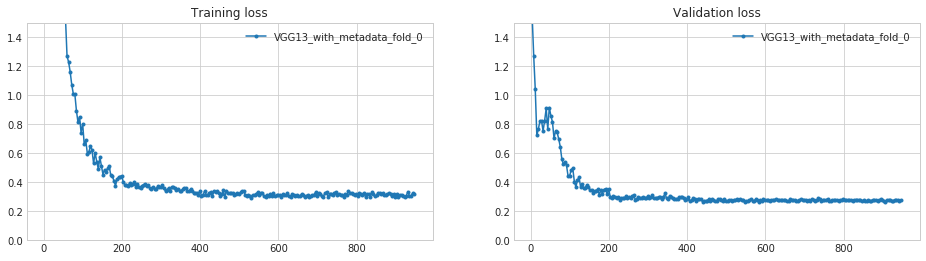

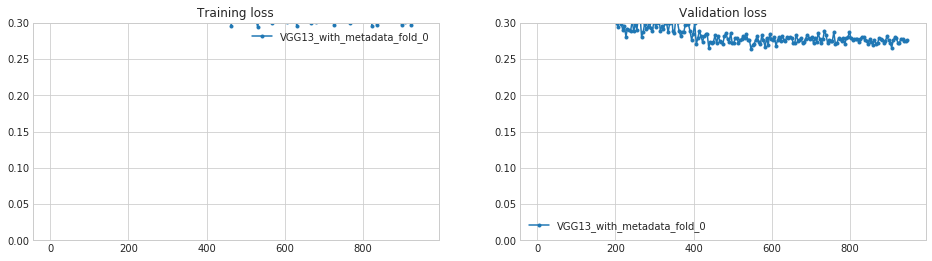

In [1488]:
draw_curves('VGG13_with_metadata', '20171219_0746_training_config_vgg13_angle_stats_20171218_2000/fold_0')

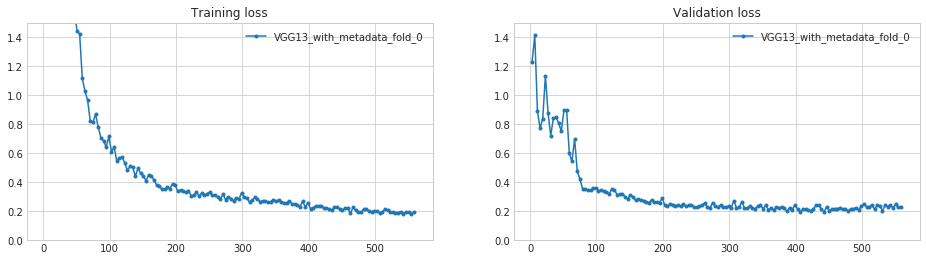

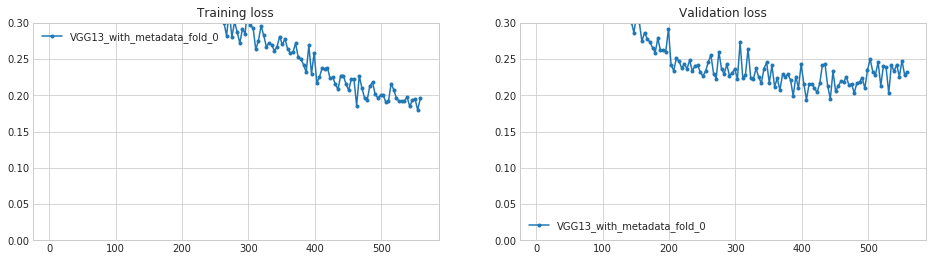

In [349]:
draw_curves('VGG13_with_metadata', '20171220_2244_training_config_vgg13_angle_stats_20171220_2339')

In [1465]:
!find ../output/20171219_0121_training_config_vgg13_angle_stats_20171218_2000 -name "*.pth.*"

../output/20171219_0121_training_config_vgg13_angle_stats_20171218_2000/fold_2/model_val_loss=0.3593.pth.tar
../output/20171219_0121_training_config_vgg13_angle_stats_20171218_2000/fold_4/model_val_loss=0.3218.pth.tar
../output/20171219_0121_training_config_vgg13_angle_stats_20171218_2000/fold_0/model_val_loss=0.2716.pth.tar
../output/20171219_0121_training_config_vgg13_angle_stats_20171218_2000/fold_3/model_val_loss=0.2870.pth.tar
../output/20171219_0121_training_config_vgg13_angle_stats_20171218_2000/fold_1/model_val_loss=0.2919.pth.tar


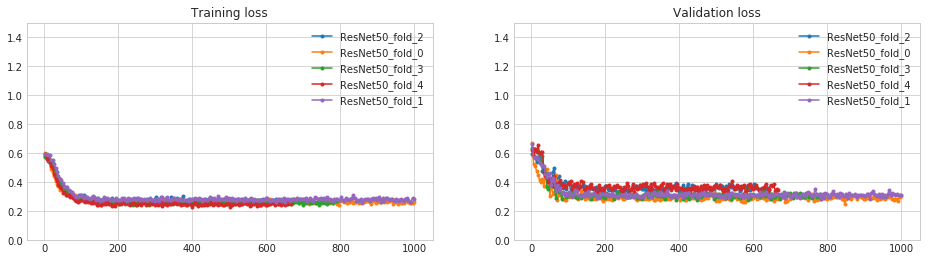

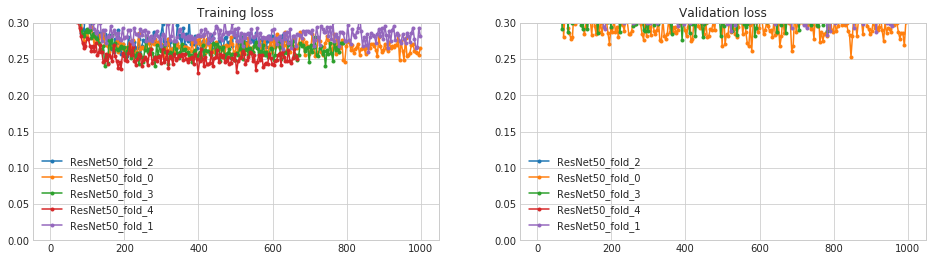

In [1485]:
draw_curves('ResNet50', '20171219_0746_training_config_resnet50_20171219_0140')

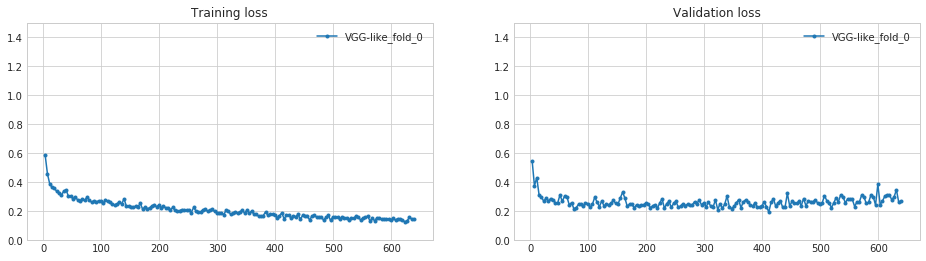

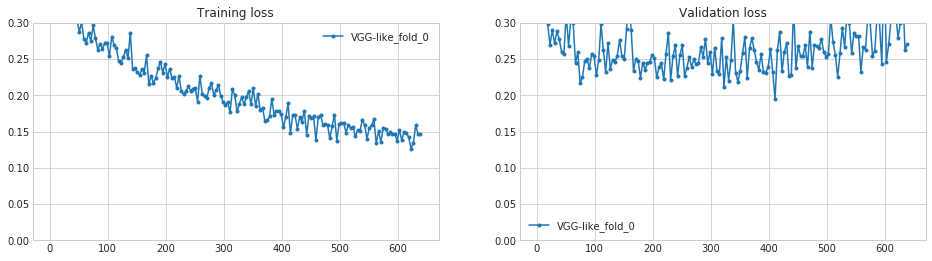

In [1209]:
draw_curves('VGG-like', '20171217_2144_training_config_vgglike_20171217_2225')

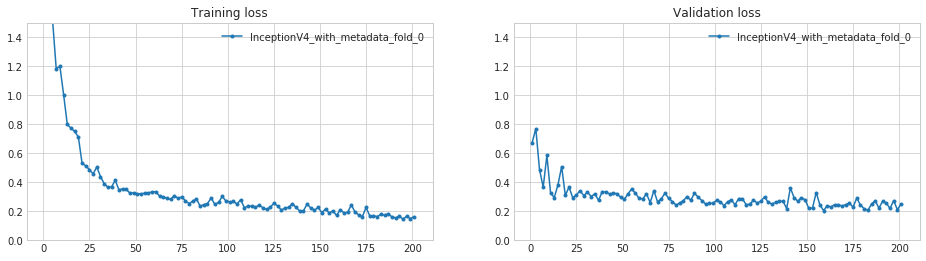

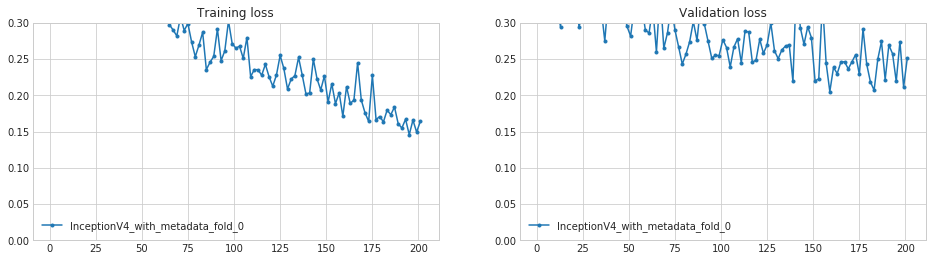

In [688]:
draw_curves('InceptionV4_with_metadata', '20171216_1803_training_config_inceptionv4_angle_stats_20171216_1900')

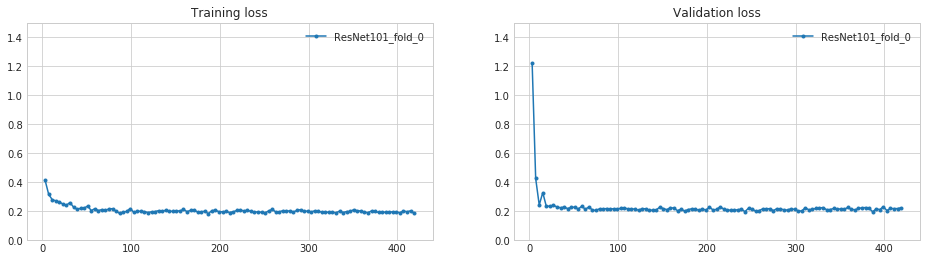

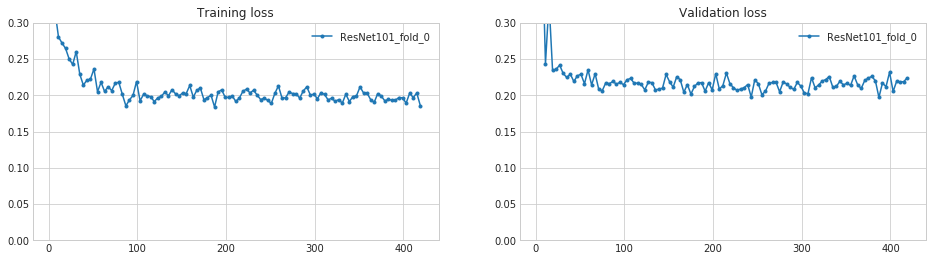

In [821]:
draw_curves('ResNet_1_Pool', '20171216_2155_training_config_resnet_20171216_2246')

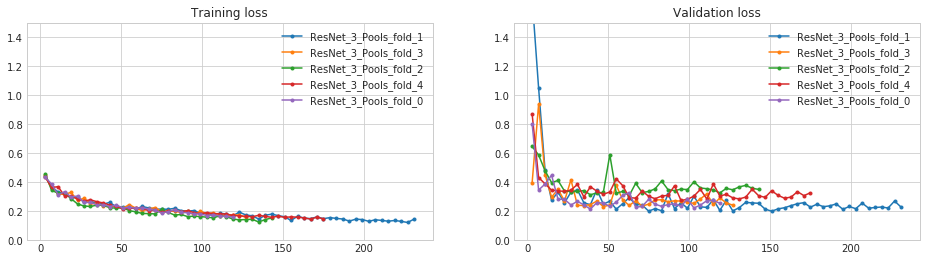

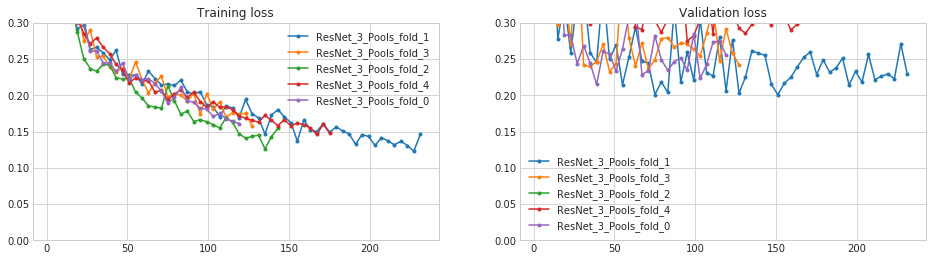

In [970]:
draw_curves('ResNet_3_Pools', '20171216_2238_training_config_resnet_3_pools_20171216_2336')

In [971]:
!find ../output/ -name "*.pth.*" | grep resnet_3

../output/20171216_2238_training_config_resnet_3_pools_20171216_2336/fold_2/model_val_loss=0.3090.pth.tar
../output/20171216_2238_training_config_resnet_3_pools_20171216_2336/fold_4/model_val_loss=0.2750.pth.tar
../output/20171216_2238_training_config_resnet_3_pools_20171216_2336/fold_0/model_val_loss=0.2151.pth.tar
../output/20171216_2238_training_config_resnet_3_pools_20171216_2336/fold_3/model_val_loss=0.2328.pth.tar
../output/20171216_2238_training_config_resnet_3_pools_20171216_2336/fold_1/model_val_loss=0.2009.pth.tar


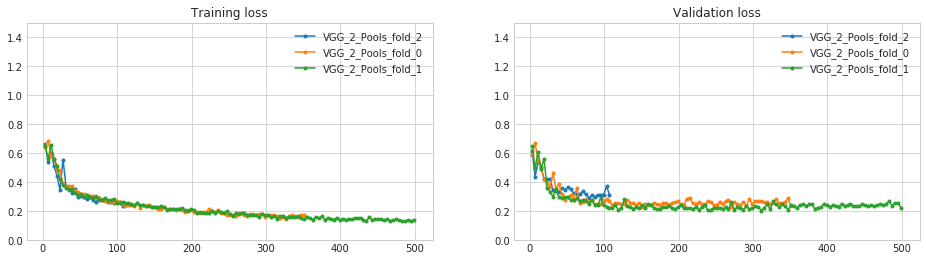

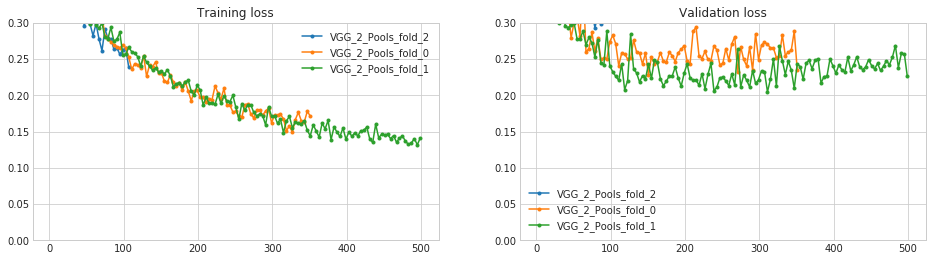

In [891]:
draw_curves('VGG_2_Pools', '20171216_2230_training_config_vgg_2_pools_20171216_2314')

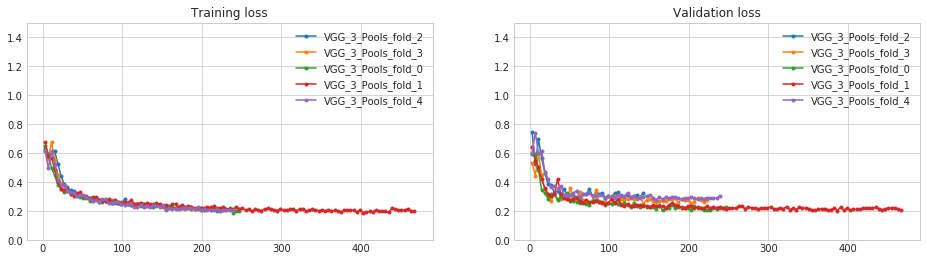

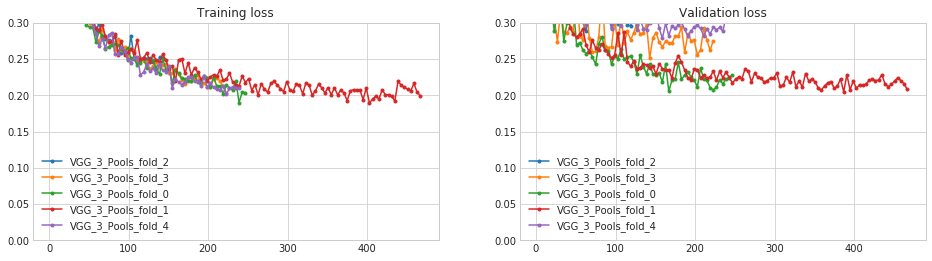

In [984]:
draw_curves('VGG_3_Pools', '20171216_2312_training_config_vgg_3_pools_20171216_2314')

In [998]:
!find ../output/ -name "*.pth.*" | grep vgg_3_pools_20171216_2314

../output/20171216_2312_training_config_vgg_3_pools_20171216_2314/fold_2/model_val_loss=0.2889.pth.tar
../output/20171216_2312_training_config_vgg_3_pools_20171216_2314/fold_4/model_val_loss=0.2785.pth.tar
../output/20171216_2312_training_config_vgg_3_pools_20171216_2314/fold_0/model_val_loss=0.2056.pth.tar
../output/20171216_2312_training_config_vgg_3_pools_20171216_2314/fold_3/model_val_loss=0.2513.pth.tar
../output/20171216_2312_training_config_vgg_3_pools_20171216_2314/fold_1/model_val_loss=0.2048.pth.tar
../output/20171216_2247_training_config_vgg_3_pools_20171216_2314/fold_0/model_val_loss=0.2203.pth.tar


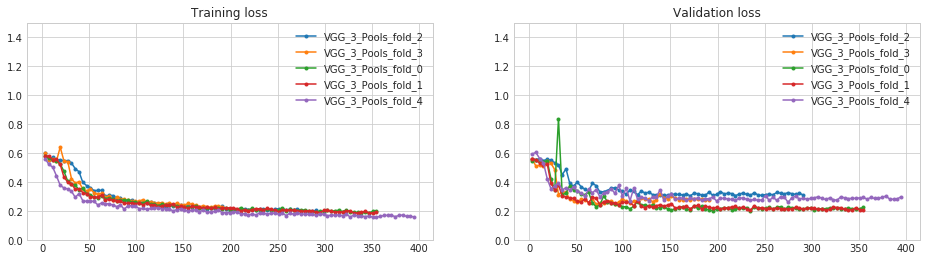

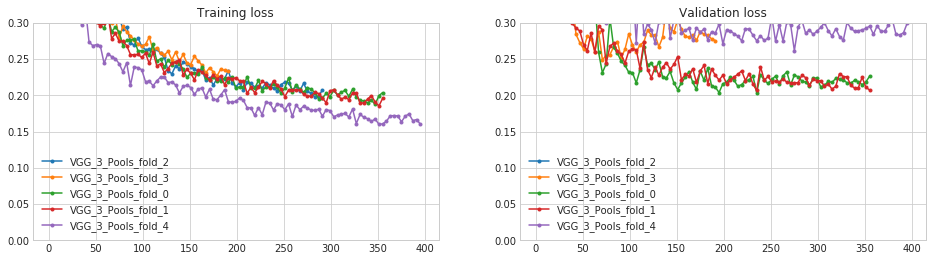

In [993]:
draw_curves('VGG_3_Pools', '20171217_0113_training_config_vgg_3_pools_20171217_0034')

In [999]:
!find ../output/20171217_0113_training_config_vgg_3_pools_20171217_0034 -name "*.pth.*"

../output/20171217_0113_training_config_vgg_3_pools_20171217_0034/fold_2/model_val_loss=0.3073.pth.tar
../output/20171217_0113_training_config_vgg_3_pools_20171217_0034/fold_4/model_val_loss=0.2618.pth.tar
../output/20171217_0113_training_config_vgg_3_pools_20171217_0034/fold_0/model_val_loss=0.2037.pth.tar
../output/20171217_0113_training_config_vgg_3_pools_20171217_0034/fold_3/model_val_loss=0.2494.pth.tar
../output/20171217_0113_training_config_vgg_3_pools_20171217_0034/fold_1/model_val_loss=0.2068.pth.tar


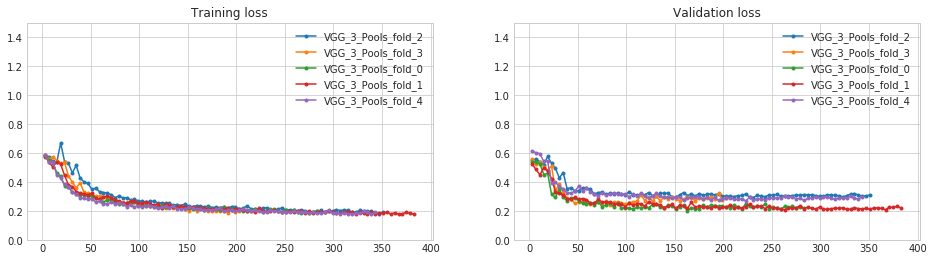

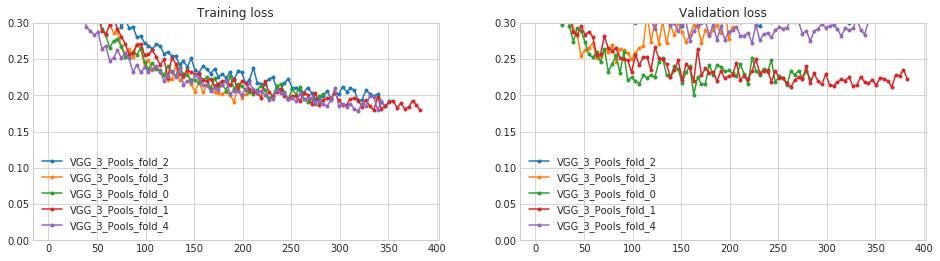

In [994]:
draw_curves('VGG_3_Pools', '20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234')

In [996]:
!find ../output/20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234 -name "*.pth.*"

../output/20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234/fold_2/model_val_loss=0.2951.pth.tar
../output/20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234/fold_4/model_val_loss=0.2723.pth.tar
../output/20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234/fold_0/model_val_loss=0.2011.pth.tar
../output/20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234/fold_3/model_val_loss=0.2462.pth.tar
../output/20171217_0124_training_config_vgg_3_pools_ccrop48_20171217_0234/fold_1/model_val_loss=0.2112.pth.tar


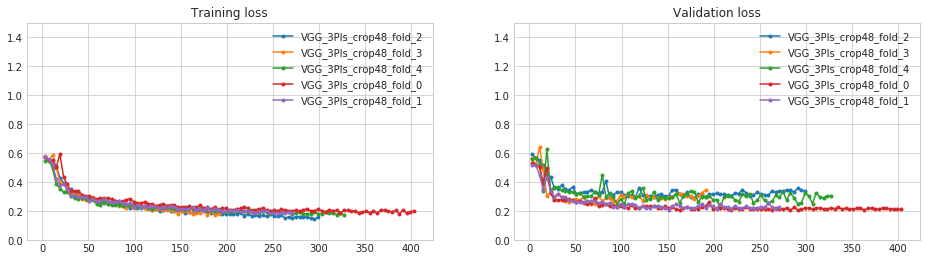

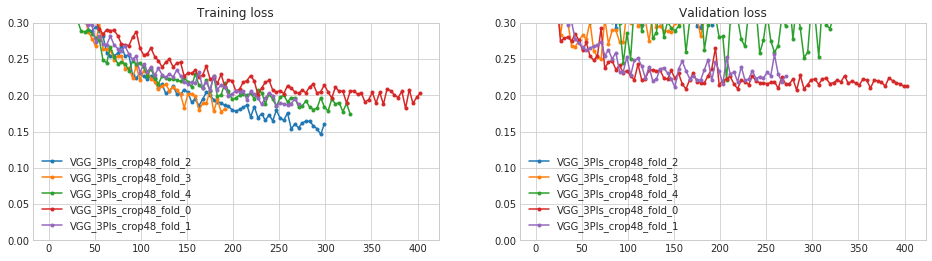

In [1010]:
draw_curves('VGG_3Pls_crop48', '20171217_1434_training_config_vgg_3_pools_ccrop48_20171217_1434')

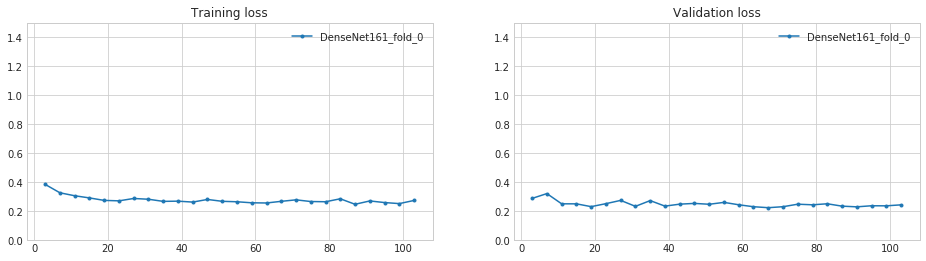

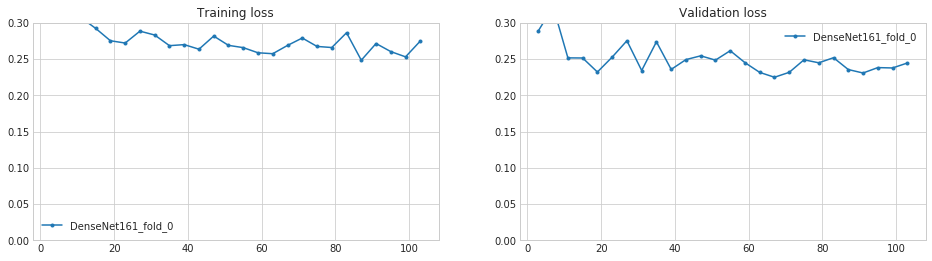

In [59]:
draw_curves('DenseNet161', '20171219_2254_training_config_densenet161_20171219_2332')

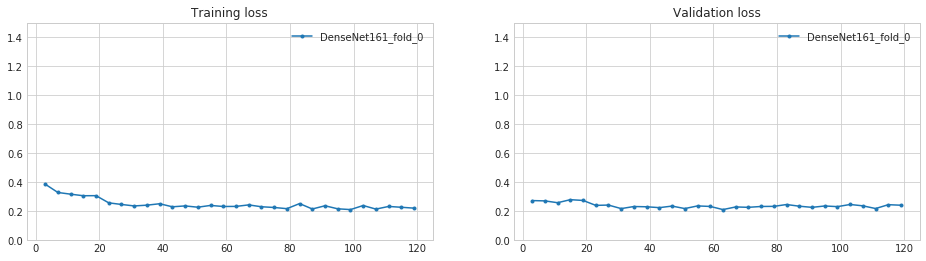

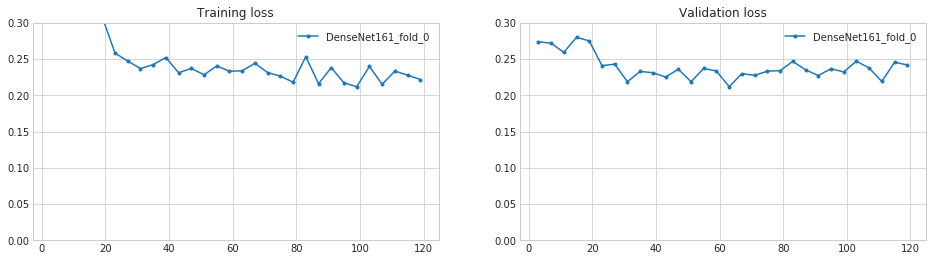

In [78]:
draw_curves('DenseNet161', '20171219_2300_training_config_densenet161_20171219_2359')

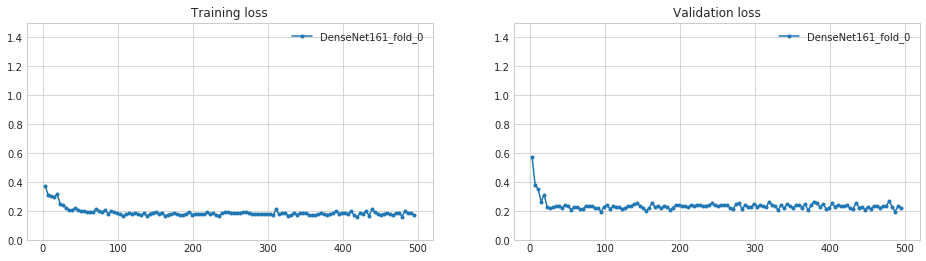

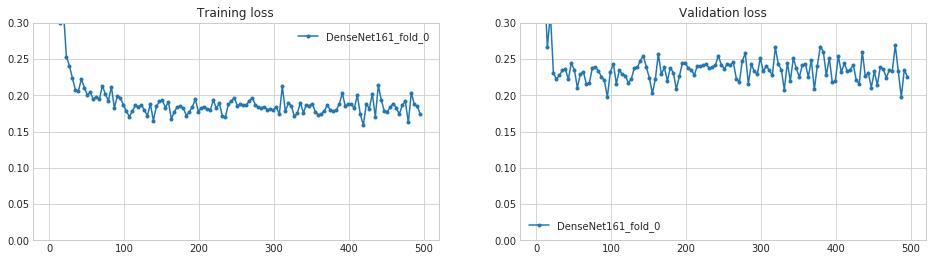

In [121]:
draw_curves('DenseNet161', '20171220_0807_training_config_densenet161_20171219_2359/fold_0')

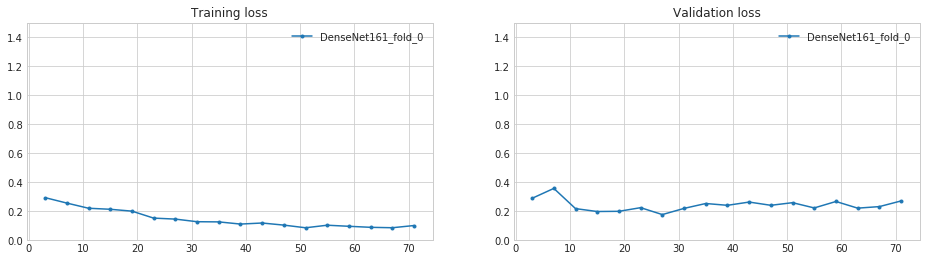

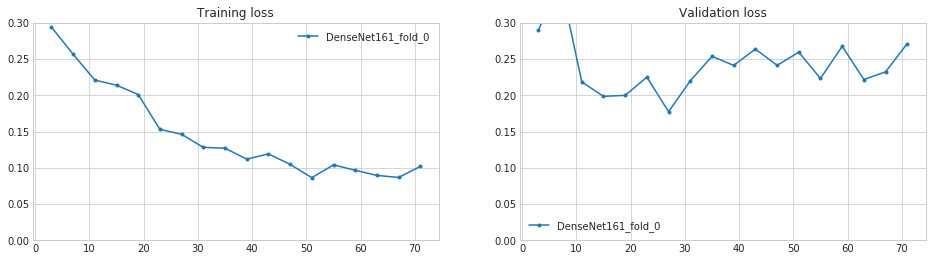

In [441]:
draw_curves('DenseNet161', '20171220_2341_training_config_densenet161_20171221_0040')

Kaggle Public score: 0.1993

`submission__gmean_models__20171221_0934_predictions_config_kfolds_densenet_20171221_0830.csv`

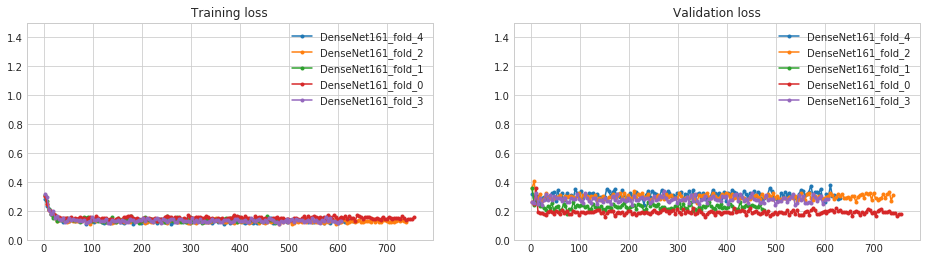

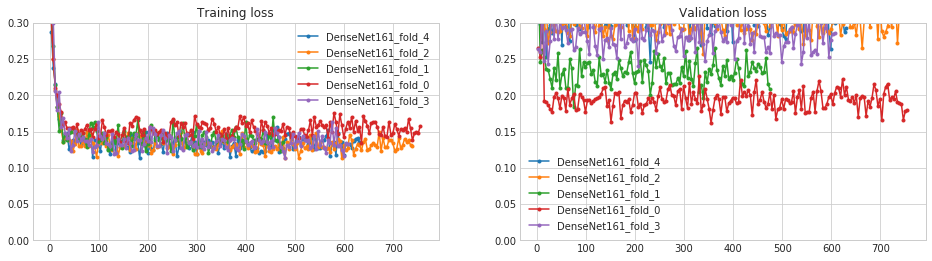

In [442]:
draw_curves('DenseNet161', '20171220_2349_training_config_densenet161_20171221_0040')

In [445]:
!find ../output/20171220_2349_training_config_densenet161_20171221_0040 -name "*.pth.*"

../output/20171220_2349_training_config_densenet161_20171221_0040/fold_2/model_val_loss=0.2575.pth.tar
../output/20171220_2349_training_config_densenet161_20171221_0040/fold_4/model_val_loss=0.2463.pth.tar
../output/20171220_2349_training_config_densenet161_20171221_0040/fold_0/model_val_loss=0.1618.pth.tar
../output/20171220_2349_training_config_densenet161_20171221_0040/fold_3/model_val_loss=0.2402.pth.tar
../output/20171220_2349_training_config_densenet161_20171221_0040/fold_1/model_val_loss=0.1839.pth.tar


Compare with VGGv0
```
../output/training_IcebergVGGv0_20171209_1049/fold_2/model_val_loss=0.2979.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_4/model_val_loss=0.2322.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_0/model_val_loss=0.2558.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_3/model_val_loss=0.1948.pth.tar
../output/training_IcebergVGGv0_20171209_1049/fold_1/model_val_loss=0.1769.pth.tar
```

In [465]:
!cp -R ../output/20171221_0934_predictions_config_kfolds_densenet_20171221_0830/ ../output/20171221_1100_predictions_best_models/

In [477]:
!ls ../output/20171221_1100_predictions_best_models/*

../output/20171221_1100_predictions_best_models/20171221_0934_predictions_config_kfolds_densenet_20171221_0830:
y_probas_0_IcebergDenseNet161.csv  y_probas_2_IcebergDenseNet161.csv
y_probas_0_IcebergDenseNet161.npz  y_probas_2_IcebergDenseNet161.npz

../output/20171221_1100_predictions_best_models/predictions_config_kfolds_vgg_v0_20171209_1200_20171209_1114:
y_probas_1_IcebergVGGv0.csv  y_probas_3_IcebergVGGv0.npz
y_probas_1_IcebergVGGv0.npz  y_probas_4_IcebergVGGv0.csv
y_probas_3_IcebergVGGv0.csv  y_probas_4_IcebergVGGv0.npz


### DenseNet161 dataflow tests

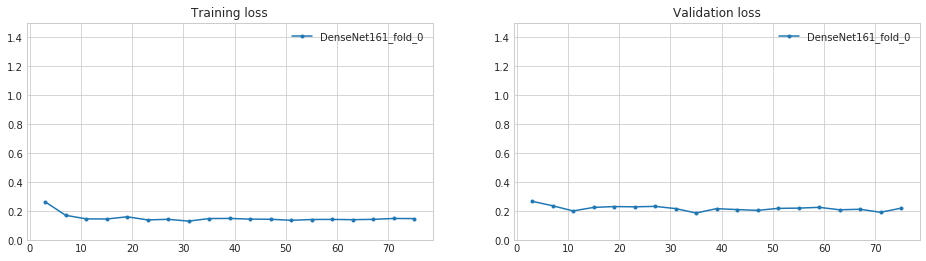

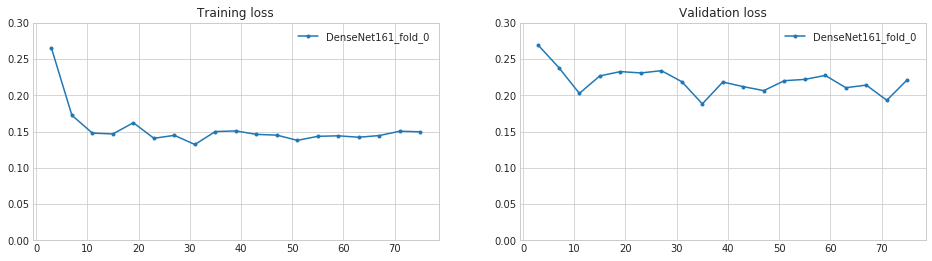

In [629]:
draw_curves('DenseNet161', '20171221_1320_training_config_densenet161_3b_minimal_data_aug')

### Show all trained models

In [427]:
!find ../output/ -name "*.pth.*" | grep -E "densenet.*=0.1"

../output/20171220_2316_training_config_densenet161_20171221_0014/fold_0/model_val_loss=0.1725.pth.tar
../output/20171220_2332_training_config_densenet161_20171221_0014/fold_0/model_val_loss=0.1735.pth.tar
../output/20171220_2114_training_config_densenet161_20171220_2101/fold_0/model_val_loss=0.1931.pth.tar
../output/20171220_2233_training_config_densenet161_20171220_2101/fold_0/model_val_loss=0.1910.pth.tar
../output/20171220_2157_training_config_densenet161_20171220_2101/fold_0/model_val_loss=0.1981.pth.tar
../output/20171220_2003_training_config_densenet161_20171220_2101/fold_0/model_val_loss=0.1852.pth.tar
../output/20171220_2304_training_config_densenet161_20171220_2101/fold_0/model_val_loss=0.1821.pth.tar
../output/20171220_2322_training_config_densenet161_20171221_0014/fold_0/model_val_loss=0.1890.pth.tar
../output/20171220_2228_training_config_densenet161_20171220_2101/fold_0/model_val_loss=0.1788.pth.tar
../output/20171220_0807_training_config_densenet161_20171219_2359/fold_0/

In [1511]:
!find ../output/ -name "*.pth.*" | grep -E "training_IcebergDenseNet4_20171208_0005"

../output/training_IcebergDenseNet4_20171208_0005/fold_6/model_val_loss=0.2524.pth.tar
../output/training_IcebergDenseNet4_20171208_0005/fold_5/model_val_loss=0.3288.pth.tar
../output/training_IcebergDenseNet4_20171208_0005/fold_2/model_val_loss=0.1407.pth.tar
../output/training_IcebergDenseNet4_20171208_0005/fold_4/model_val_loss=0.2197.pth.tar
../output/training_IcebergDenseNet4_20171208_0005/fold_0/model_val_loss=0.2059.pth.tar
../output/training_IcebergDenseNet4_20171208_0005/fold_3/model_val_loss=0.2418.pth.tar
../output/training_IcebergDenseNet4_20171208_0005/fold_1/model_val_loss=0.3109.pth.tar


In [122]:
!find ../output/ -name "*.pth.*" | grep -E "config_densenet_20171208_2354"

../output/20171219_1819_training_config_densenet_20171208_2354/fold_0/model_val_loss=0.2152.pth.tar
